<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/Javy22/Proyecto_Python_Analitycs/main/images/Obesidad.png" width="1000" align="center"></a>


# Proyecto Final

Clasificación utilizando el dataset de Tabla Obesidad<br>

v1.0

In [75]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

# Recolectar datos
<img src="https://raw.githubusercontent.com/Javy22/Proyecto_Python_Analitycs/main/images/Pipeline_1.png" width="1000" align="middle">

In [76]:
if os.access('Tabla_Obesidad.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/Javy22/Proyecto_Python_Analitycs/main/Tabla_Obesidad.csv
    else:
        !wget Tabla_Obesidad.csv https://raw.githubusercontent.com/Javy22/Proyecto_Python_Analitycs/main/Tabla_Obesidad.csv

### `Tabla_Obesidad.csv`:
El dataset **`Tabla_Obesidad.csv`** contiene datos sobre los personas con sus valores de peso.<br>
- **Gender** --> Sexo
- **Age** --> Edad
- **Height** --> Altura
- **Weight** --> Peso
- **family_history_with_overweight**--> Historial Familiar con sobrepeso
- **FAVC** --> Frecuencia consumición altas calorias
- **FCVC** --> Frecuencia consumición vegetales
- **NEP** --> Numero de comidas principales
- **CAEC** --> Consumo de alimentos entre comidas
- **Smoke** --> Fumador
- **CH2O** --> Consumo de agua
- **SCC** --> Consumo de calorias monitoreadas
- **FAF** --> Frecuencia actividad Pfisica
- **TUE** --> Tiempo con aparatos tecnológicos
- **CALC** --> Consumo de Alcohol
- **MTRANS** --> Transporte utilizado

# Procesar datos
<img src="https://raw.githubusercontent.com/Javy22/Proyecto_Python_Analitycs/main/images/Pipeline_2.png" width="1000" align="middle">

In [77]:
data = pd.read_csv('Tabla_Obesidad.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [78]:
data = pd.read_csv("Tabla_Obesidad.csv")
des = data.describe()
des.loc['Nan'] = data.isna().sum()
des.loc['%Nan'] = (data.isna().mean())*100
des

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Explorar datos
<img src="https://raw.githubusercontent.com/Javy22/Proyecto_Python_Analitycs/main/images/Pipeline3.png" width="1000" align="middle">

In [79]:
# limpio todas las filas vacias de la tabla Weight y Height.
data_clean = data.copy()
data_clean.dropna(subset=['Weight'], inplace=True)
data_clean.dropna(subset=['Height'], inplace=True)

In [80]:
# Total de filas y colimnas a analizar
# (filas, columnas)
data_clean.shape

(2111, 17)

In [81]:
# copiamos los datos a un nuevo dataset (data2), pero ahora transformamos las columnas en 
# Peso --> proveniente de Weight.
# Altura --> proveniente de Height.
# Sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)
# IMC --> calculamos el indice de masa corporal
# Condicion -->proveniente de Nobeyesdad.
data2 = pd.DataFrame()
data2['Sexo'] = data['Gender'].apply(lambda x: 'masculino' if x == 'Male' else 'femenino')
data2['Altura'] = data['Height'] 
data2['Peso'] = data['Weight'] 
data2['IMC'] = data['Weight'] / (data['Height']*data['Height'])
data2['Condición'] = data['NObeyesdad']
data2.head()

,Sexo,Altura,Peso,IMC,Condición
0,femenino,1.62,64.0,24.386526,Normal_Weight
1,femenino,1.52,56.0,24.238227,Normal_Weight
2,masculino,1.80,77.0,23.765432,Normal_Weight
3,masculino,1.80,87.0,26.851852,Overweight_Level_I
4,masculino,1.78,89.8,28.342381,Overweight_Level_II


In [82]:
des = data2.describe()
des

,Altura,Peso,IMC
count,2111.000000,2111.000000,2111.000000
mean,1.701677,86.586058,29.700159
std,0.093305,26.191172,8.011337
min,1.450000,39.000000,12.998685
25%,1.630000,65.473343,24.325802
50%,1.700499,83.000000,28.719089
75%,1.768464,107.430682,36.016501
max,1.980000,173.000000,50.811753


In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
data_cod = data2.copy()

In [85]:
# Transformo la columna Condición en valor númerico
le = LabelEncoder()
label_encoding = le.fit_transform(data_cod['Condición'])
data_cod['Condición'] = label_encoding
label_encoding = le.fit_transform(data_cod['Sexo'])
data_cod['Sexo'] = label_encoding
data_cod.head(20)

,Sexo,Altura,Peso,IMC,Condición
0,0,1.62,64.0,24.386526,1
1,0,1.52,56.0,24.238227,1
2,1,1.80,77.0,23.765432,1
3,1,1.80,87.0,26.851852,5
4,1,1.78,89.8,28.342381,6
5,1,1.62,53.0,20.195092,1
6,0,1.50,55.0,24.444444,1
7,1,1.64,53.0,19.705532,1
8,1,1.78,64.0,20.199470,1
9,1,1.72,68.0,22.985398,1


In [86]:
le.classes_

array(['femenino', 'masculino'], dtype=object)

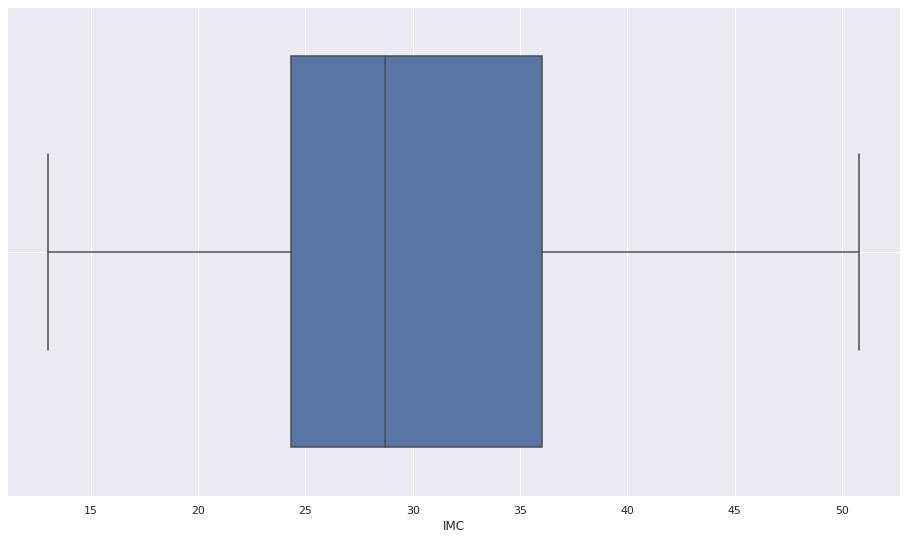

In [87]:
# Renderizamos el gráfico utilizando el diagrama de cajas
#df_ars.boxplot(column=['m2'])
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
sns.boxplot(x=data2['IMC'], ax=ax)
ax.grid('dashed')

In [88]:
data2['Condición'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: Condición, dtype: int64

Colocar los niveles de obesidad

# Explorar datos
<img src="https://raw.githubusercontent.com/Javy22/Proyecto_Python_Analitycs/main/images/Pipeline_4.png" width="1000" align="middle">

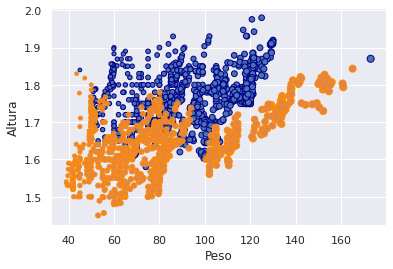

In [89]:
# Graficamos el peso (y) en función de la altura (x) + IMC pero para ambos sexos por separados
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(data2[data2['Sexo'] == 'masculino']['Peso'], data2[data2['Sexo'] == 'masculino']['Altura'],data2[data2['Sexo'] == 'masculino']['IMC'], edgecolors='darkBlue', label='masculino')
ax.scatter(data2[data2['Sexo'] == 'femenino']['Peso'], data2[data2['Sexo'] == 'femenino']['Altura'],data2[data2['Sexo'] == 'femenino']['IMC'], edgecolors='darkOrange', label='femenino')
ax.set_xlabel('Peso')
ax.set_ylabel('Altura')
plt.show()

IMC promedio Hombres: 29.280377404164792


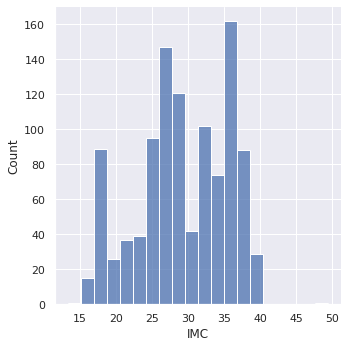

In [90]:
# Distribucion (histograma) del IMC en hombres
# En pantalla el valor medio
print('IMC promedio Hombres:', data2[data2['Sexo'] == 'masculino']['IMC'].mean())
sns.displot(data2[data2['Sexo'] == 'masculino']['IMC'])
plt.show()

IMC promedio mujeres: 30.13000202644804


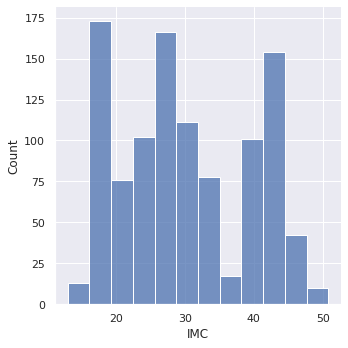

In [91]:
# Distribucion (histograma) del IMC en Mujeres.
# Además, imprimir en pantalla el valor medio
print('IMC promedio mujeres:', data2[data2['Sexo'] == 'femenino']['IMC'].mean())
sns.displot(data2[data2['Sexo'] == 'femenino']['IMC'])
plt.show()

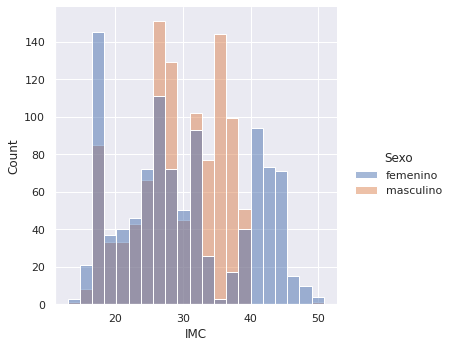

In [92]:

sns.displot(data=data2, x="IMC", hue="Sexo")
plt.show()


In [93]:
# Graficamos el número de porcentaje según su peso
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(data))
    g = sns.countplot(data[feature], order = data[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Numero de porcentaje según {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


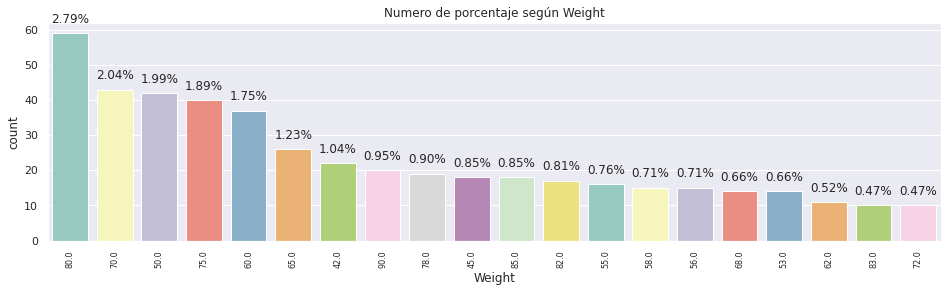

In [94]:
plot_count("Weight", "Weight", data,4)
plt.show()

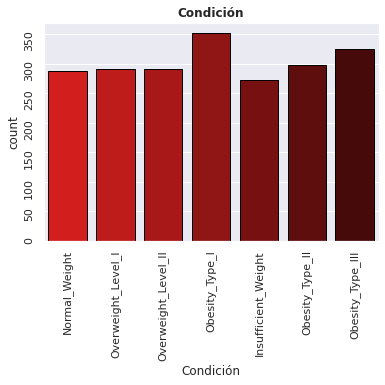

In [95]:
# Graficamos según su condicón
sns.countplot(x="Condición",data=data2,palette="flag",edgecolor="black")
plt.title('Condición', weight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
# changing the font size
sns.set(font_scale=1)

# Entrenar modelo
<img src="https://raw.githubusercontent.com/Javy22/Proyecto_Python_Analitycs/main/images/Pipeline_5.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [96]:
# Generamos un numpy array "X" que posea todos los feutres 
# generamos un array numpy "y" de solo la columna Condición
X = data_cod.drop('Condición', axis=1).values
y = data_cod['Condición'].values

In [97]:
# Generaramos los dataset de train y test superando en 70%30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
# Entrenamos un clasificador cualquier sea con los datos de train
# Generamos las predicciones y_hat con el dataset de test
from sklearn.ensemble  import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=4, max_depth=5, criterion='entropy', random_state = 0)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# Validar modelo
<img src="https://raw.githubusercontent.com/Javy22/Proyecto_Python_Analitycs/main/images/Pipeline_6.png" width="1000" align="middle">

In [99]:
#calculamos la exactitud (accuracy) de su clasificador
# Debe superar el modelo base (50%)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.9684542586750788

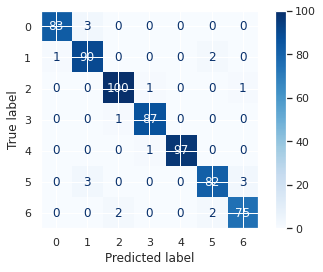

In [100]:
# Dibujamos la matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

In [101]:
data_cod.dtypes

Sexo           int64
Altura       float64
Peso         float64
IMC          float64
Condición      int64
dtype: object

In [102]:
data_cod

,Sexo,Altura,Peso,IMC,Condición
0,0,1.620000,64.000000,24.386526,1
1,0,1.520000,56.000000,24.238227,1
2,1,1.800000,77.000000,23.765432,1
3,1,1.800000,87.000000,26.851852,5
4,1,1.780000,89.800000,28.342381,6
...,...,...,...,...,...
2106,0,1.710730,131.408528,44.901475,4
2107,0,1.748584,133.742943,43.741923,4
2108,0,1.752206,133.689352,43.543817,4
2109,0,1.739450,133.346641,44.071535,4


# Utilizar modelo
<img src="https://raw.githubusercontent.com/Javy22/Proyecto_Python_Analitycs/main/images/Pipeline7.png" width="1000" align="middle">

In [103]:
from pandas.core.sorting import get_group_index_sorter
# Prueba el modelo, ingrese datos ficticios...
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores

Sexo = 'femenino'
Altura = 1.93
Peso = 102
IMC = 27.38


# Casteamos el array que devuelve le.transform a int
sexo_encoded = int(le.transform([Sexo]))
# Crear el array de entrada
X_prueba = np.array([sexo_encoded, Altura, Peso, IMC])
# El sistema espera 1 fila y N columnas, hay que hacer reshape
X_prueba = X_prueba.reshape(1, -1)
y_prueba = clf.predict(X_prueba)

if y_prueba == 2:
    print('Obesity_Type_I')
if y_prueba == 4:
    print('Obesity_Type_III')
if y_prueba == 3:
    print('Obesity_Type_II')
if y_prueba == 5:
    print('Overweight_Level_I')
if y_prueba == 6:
    print('Overweight_Level_II')
if y_prueba == 1:
    print('Normal_Weight')
if y_prueba == 0:
    print('Insufficient_Weight')     



Overweight_Level_II


#### Exportar

In [104]:
import pickle
# Salvar el modelo
pickle.dump(clf, open('Obesidad_model.pkl', 'wb'))
# Salvar el codificador
pickle.dump(le, open('Obesidad_encoder.pkl', 'wb'))

Conclusión :
La misma demuestra que debemos cuidarnos, la idea principal es llevar una vida sana y medida, está comprobado que realizar ejercicio y comer sano mejoran la calidad de vida
